# 01 – Explorar HAM10000

In [1]:
import sys
from pathlib import Path

CWD = Path.cwd()
if CWD.name == "notebooks" and (CWD.parent / "src").exists():
    sys.path.insert(0, str(CWD.parent))     # raiz do projeto
elif (CWD / "src").exists():
    sys.path.insert(0, str(CWD))            # caso execute da raiz

In [2]:
from pathlib import Path
from src import viz
from src.data import load_metadata, class_distribution

viz.configure()  # aplique o padrão ANTES de plotar

# Detecta automaticamente onde está a pasta do dataset,
# considerando se o CWD é a raiz do projeto ou a pasta notebooks/
CWD = Path.cwd()
candidates = [
    CWD / "data" / "raw" / "HAM10000",
    CWD.parent / "data" / "raw" / "HAM10000"  # se o CWD for notebooks/
]

DATA_ROOT = next((p for p in candidates if (p / "HAM10000_metadata.csv").exists()), None)

# Fallback: busca o CSV em toda a árvore (mais lento, mas salva em casos atípicos)
if DATA_ROOT is None:
    meta_any = next((p for p in CWD.rglob("HAM10000_metadata.csv")), None)
    if meta_any:
        DATA_ROOT = meta_any.parent

if DATA_ROOT is None:
    raise FileNotFoundError(f"Não achei HAM10000_metadata.csv. CWD={CWD}")

# Confirma o caminho encontrado (bom para sanity-check)
print("DATA_ROOT:", DATA_ROOT)

meta = DATA_ROOT / "HAM10000_metadata.csv"
df = load_metadata(meta)
dist = class_distribution(df)
dist  # exibe a tabela


DATA_ROOT: C:\Users\Filip\OneDrive\Documentos\Documentos - Doc, Docx\PUCRS - TCC 15-07-2025\tcc_skin_cancer_day1\data\raw\HAM10000


,dx,count,pct
0,nv,6705,0.6695
1,mel,1113,0.1111
2,bkl,1099,0.1097
3,bcc,514,0.0513
4,akiec,327,0.0327
5,vasc,142,0.0142
6,df,115,0.0115


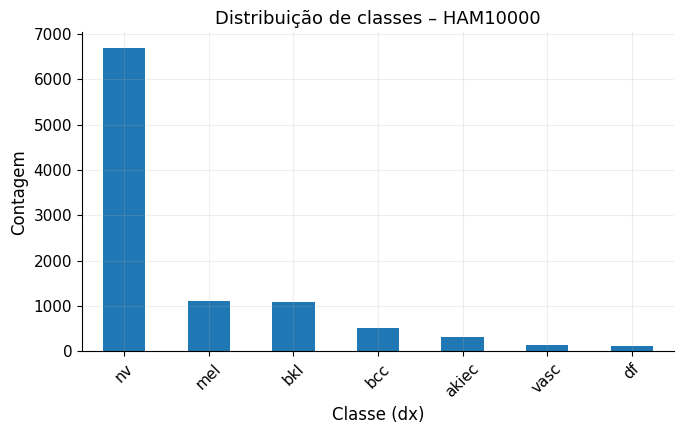

In [3]:
import matplotlib.pyplot as plt
from src import viz

fig, ax = viz.fig_ax(size="M")  # 7.0" x 4.5" => 2100x1350 px @300
dist.plot(kind="bar", x="dx", y="count", legend=False, rot=45, ax=ax)
ax.set_title("Distribuição de classes – HAM10000")
ax.set_xlabel("Classe (dx)")
ax.set_ylabel("Contagem")
viz.beautify_axes(ax)
viz.save_fig(fig, "outputs/figures/ham10000_class_dist.png")
plt.show()
